In [117]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")


In [118]:
df=pd.read_csv('/kaggle/input/nsetataglobal/NSE-TATAGLOBAL11.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [119]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [120]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [121]:
df.shape

(1235, 8)

In [122]:
df1=df.reset_index()['Close']
df1

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

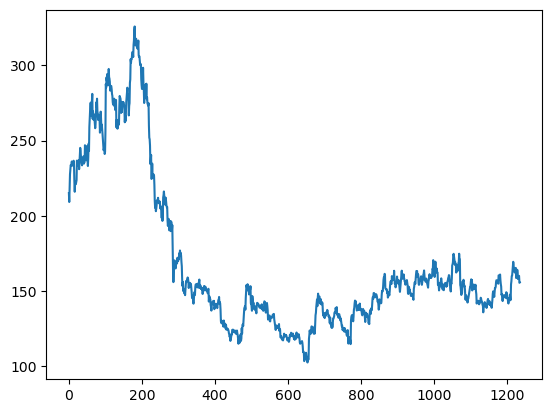

In [123]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [49]:
df1

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

**Feature Scaling**

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [125]:
df1

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

In [126]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [127]:
train_size,test_size

(802, 433)

In [101]:
train_data

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       [0.56006275],
       [0.57485433],
       [0.58762887],
       [0.58538772],
       [0.58987001],
       [0.59816226],
       [0.58561183],
       [0.59143882],
       [0.59278351],
       [0.59345585],
       [0.60040341],
       [0.58852532],
       [0.53787539],
       [0.50806813],
       [0.5349619 ],
       [0.53922008],
       [0.53070372],
       [0.53675482],
       [0.5425818 ],
       [0.60085164],
       [0.59009413],
       [0.59771403],
       [0.5912147 ],
       [0.58583595],
       [0.60242044],
       [0.57530255],
       [0.59524877],
       [0.61810847],
       [0.63872703],
       [0.62909009],
       [0.61272972],
       [0.60466159],
       [0.5912147 ],
       [0.58673241],
       [0.60354101],
       [0.59928283],
       [0.6048857 ],
       [0.61340206],
       [0.59166293],
       [0.59524877],
       [0.59614523],
       [0.64657104],
       [0.62550426],
       [0.62572837],
       [0.611

In [128]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [129]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [130]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [131]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [132]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [134]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [135]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [137]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [138]:
model.fit(x_train,y_train,validation_data=(x_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 9s 298ms/step - loss: 0.0321 - val_loss: 0.0028
Epoch 2/100
11/11 [==============================] - 2s 181ms/step - loss: 0.0086 - val_loss: 0.0019
Epoch 3/100
11/11 [==============================] - 2s 175ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 4/100
11/11 [==============================] - 2s 175ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 5/100
11/11 [==============================] - 2s 175ms/step - loss: 0.0030 - val_loss: 9.6804e-04
Epoch 6/100
11/11 [==============================] - 2s 179ms/step - loss: 0.0029 - val_loss: 9.7526e-04
Epoch 7/100
11/11 [==============================] - 2s 181ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 8/100
11/11 [==============================] - 2s 176ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 9/100
11/11 [==============================] - 2s 182ms/step - loss: 0.0023 - val_loss: 9.1995e-04
Epoch 10/100
11/11 [==============================] - 2s 182ms/step - loss: 0.0

In [140]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 38ms/step


In [141]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [142]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

177.13716813514813

In [143]:
math.sqrt(mean_squared_error(ytest,test_predict))

151.50746174109446

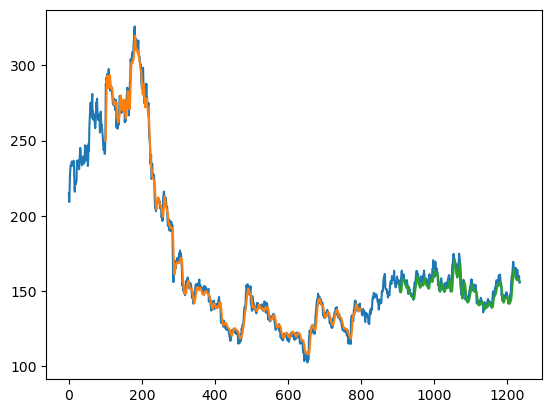

In [144]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [145]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 92)

In [146]:
len(test_data)

433

In [147]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [148]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,x_input.shape[1],1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.2336507]
93
[0.2336507]
94
[0.2336507]
95
[0.2336507]
96
[0.2336507]
97
[0.2336507]
98
[0.2336507]
99
[0.2336507]
100
[0.2336507]
101
9 day input [0.16987898 0.17525773 0.18556701 0.18915285 0.18354998 0.1824294
 0.17256835 0.18108472 0.18153294 0.17055132 0.17189601 0.16943075
 0.17705065 0.16270731 0.17346481 0.18646347 0.20416853 0.21156432
 0.20259973 0.20461676 0.19520394 0.20797848 0.22142537 0.22142537
 0.22523532 0.23890632 0.2447333  0.24406096 0.24137158 0.24271627
 0.24069924 0.23442403 0.25930076 0.25907665 0.25616316 0.24831914
 0.26176602 0.2447333  0.23330345 0.22613178 0.20103093 0.20416853
 0.18870462 0.18287763 0.19049753 0.19766921 0.19878978 0.20080681
 0.19744509 0.19520394 0.19722098 0.19229045 0.19789332 0.20909906
 0.20730614 0.20170327 0.19004931 0.19206634 0.17817122 0.17548185
 0.18377409 0.19139399 0.18780816 0.20192739 0.18511878 0.18668758
 0.23263111 0.2415957  0.25750784 0.25862842 0.27297176 0.29112506
 0.29964142 0.29157329 0.27498879 0.27947109 0.2

In [149]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [76]:
import matplotlib.pyplot as plt

In [83]:
len(df1)

1235

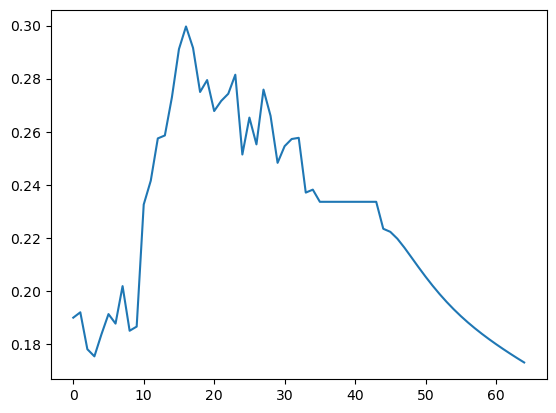

In [150]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

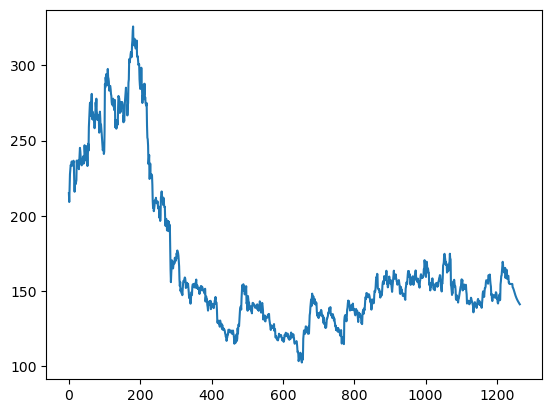

In [151]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)